In [1]:
import pickle
from helpers import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import label
%matplotlib inline

In [2]:
# 1. Histogram of Oriented Gradients (HOG)

In [3]:
# Read test image
img = cv2.imread('images/vehicles/GTI_left/image0145.png')

In [4]:
# Now experiment with some color channels

In [5]:
img_hsv = np.copy(img)
img_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2HSV)

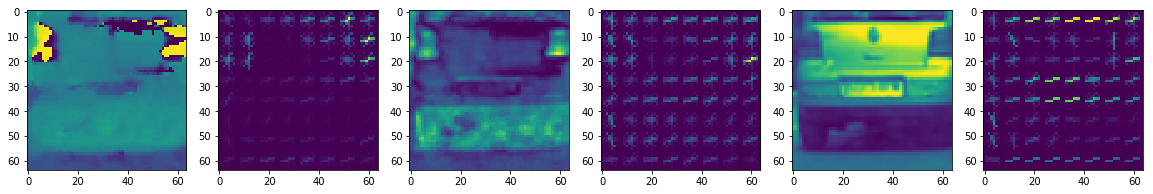

In [6]:
features, hog_img1 = get_hog_features(img_hsv[:,:,0], 9, 8, 2, True, True)
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(img_hsv[:,:,0])
plt.subplot(162)
plt.imshow(hog_img1)
features, hog_img2 = get_hog_features(img_hsv[:,:,1], 9, 8, 2, True, True)
plt.subplot(163)
plt.imshow(img_hsv[:,:,1])
plt.subplot(164)
plt.imshow(hog_img2)
features, hog_img3 = get_hog_features(img_hsv[:,:,2], 9, 8, 2, True, True)
plt.subplot(165)
plt.imshow(img_hsv[:,:,2])
plt.subplot(166)
plt.imshow(hog_img3)

In [7]:
img_luv = np.copy(img)

In [8]:
img_luv = cv2.cvtColor(img_luv, cv2.COLOR_BGR2LUV)

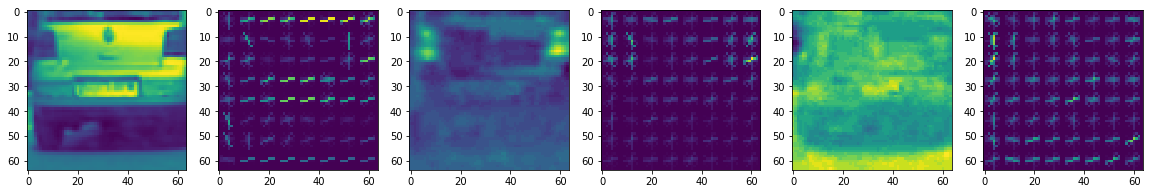

In [9]:
features, hog_img1 = get_hog_features(img_luv[:,:,0], 9, 8, 2, True, True)
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(img_luv[:,:,0])
plt.subplot(162)
plt.imshow(hog_img1)
features, hog_img2 = get_hog_features(img_luv[:,:,1], 9, 8, 2, True, True)
plt.subplot(163)
plt.imshow(img_luv[:,:,1])
plt.subplot(164)
plt.imshow(hog_img2)
features, hog_img3 = get_hog_features(img_luv[:,:,2], 9, 8, 2, True, True)
plt.subplot(165)
plt.imshow(img_luv[:,:,2])
plt.subplot(166)
plt.imshow(hog_img3)

In [10]:
img_hls = np.copy(img)
img_hls = cv2.cvtColor(img_hls, cv2.COLOR_BGR2HLS)

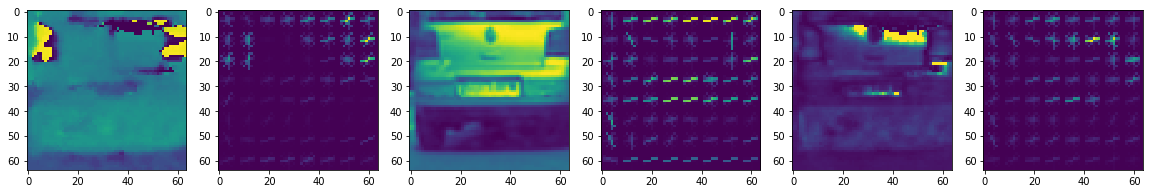

In [11]:
features, hog_img1 = get_hog_features(img_hls[:,:,0], 9, 8, 2, True, True)
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(img_hls[:,:,0])
plt.subplot(162)
plt.imshow(hog_img1)
features, hog_img2 = get_hog_features(img_hls[:,:,1], 9, 8, 2, True, True)
plt.subplot(163)
plt.imshow(img_hls[:,:,1])
plt.subplot(164)
plt.imshow(hog_img2)
features, hog_img3 = get_hog_features(img_hls[:,:,2], 9, 8, 2, True, True)
plt.subplot(165)
plt.imshow(img_hls[:,:,2])
plt.subplot(166)
plt.imshow(hog_img3)

In [12]:
img_ycrcb = np.copy(img)
img_ycrcb = cv2.cvtColor(img_ycrcb, cv2.COLOR_BGR2YCrCb)

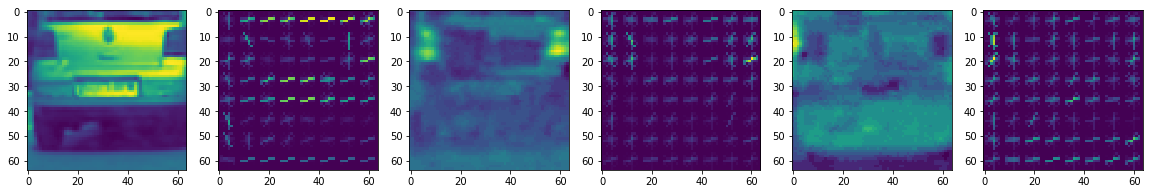

In [13]:
features, hog_img1 = get_hog_features(img_ycrcb[:,:,0], 9, 8, 2, True, True)
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(img_ycrcb[:,:,0])
plt.subplot(162)
plt.imshow(hog_img1)
features, hog_img2 = get_hog_features(img_ycrcb[:,:,1], 9, 8, 2, True, True)
plt.subplot(163)
plt.imshow(img_ycrcb[:,:,1])
plt.subplot(164)
plt.imshow(hog_img2)
features, hog_img3 = get_hog_features(img_ycrcb[:,:,2], 9, 8, 2, True, True)
plt.subplot(165)
plt.imshow(img_ycrcb[:,:,2])
plt.subplot(166)
plt.imshow(hog_img3)

In [14]:
img_bgr = np.copy(img)

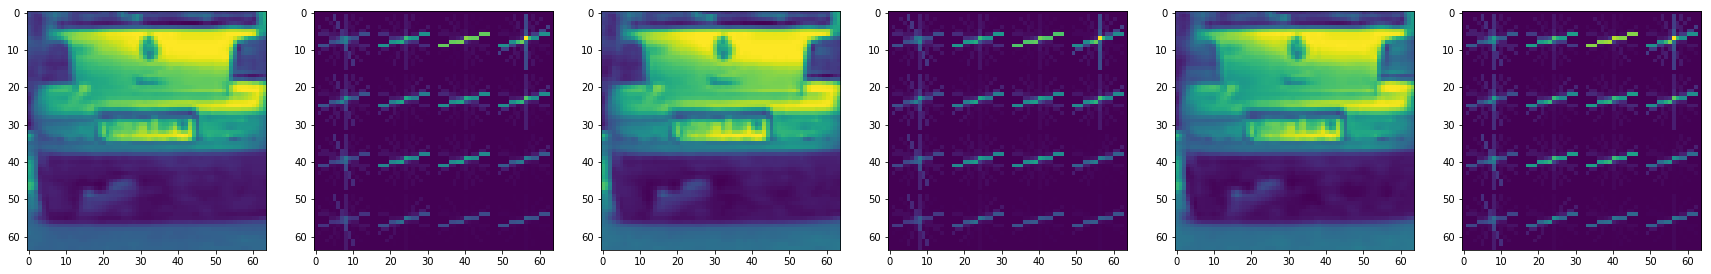

In [15]:
features, hog_img1 = get_hog_features(img_bgr[:,:,0], 9, 16, 2, True, True)
plt.figure(figsize=(30,30))
plt.subplot(161)
plt.imshow(img_bgr[:,:,0])
plt.subplot(162)
plt.imshow(hog_img1)
features, hog_img2 = get_hog_features(img_bgr[:,:,1], 9, 16, 2, True, True)
plt.subplot(163)
plt.imshow(img_bgr[:,:,1])
plt.subplot(164)
plt.imshow(hog_img2)
features, hog_img3 = get_hog_features(img_bgr[:,:,2], 9, 16, 2, True, True)
plt.subplot(165)
plt.imshow(img_bgr[:,:,2])
plt.subplot(166)
plt.imshow(hog_img3)

In [16]:
with open('classifier.pickle', 'rb') as handle:
    classifier = pickle.load(handle)

In [17]:
classifier['accuracy']

0.99352477477477474

In [18]:
clf = classifier['clf']
scaler = classifier['scaler']

In [19]:
# Parameters
svc = clf
X_scaler = scaler
color_space = 'BGR' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

In [20]:
orient = 9
pix_per_cell = 16 
cell_per_block = 2 
hog_channel = 0
spatial_size = (16, 16) 
hist_bins = 16

In [60]:
def heat(img, box_list):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,box_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    fig = plt.figure(figsize=(20,20))
    plt.subplot(121)
    draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
    plt.imshow(draw_img)
    plt.title('Car Positions')
    plt.subplot(122)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    fig.tight_layout()
    return draw_img

In [61]:
def process_image(image):
    img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    ystart = 400
    ystop = 700
    scale = 1
    img_out, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    plt.
    plt.imshow(img_out)
    ystart = 400
    ystop = 700
    scale = 2
    img_out2, bboxes2 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    plt.imshow(img_out2)
    box_list = bboxes + bboxes2
    heat_img = heat(img, box_list)
    return cv2.cvtColor(heat_img, cv2.COLOR_BGR2RGB)

SyntaxError: invalid syntax (<ipython-input-61-a5b82c2a4dca>, line 7)

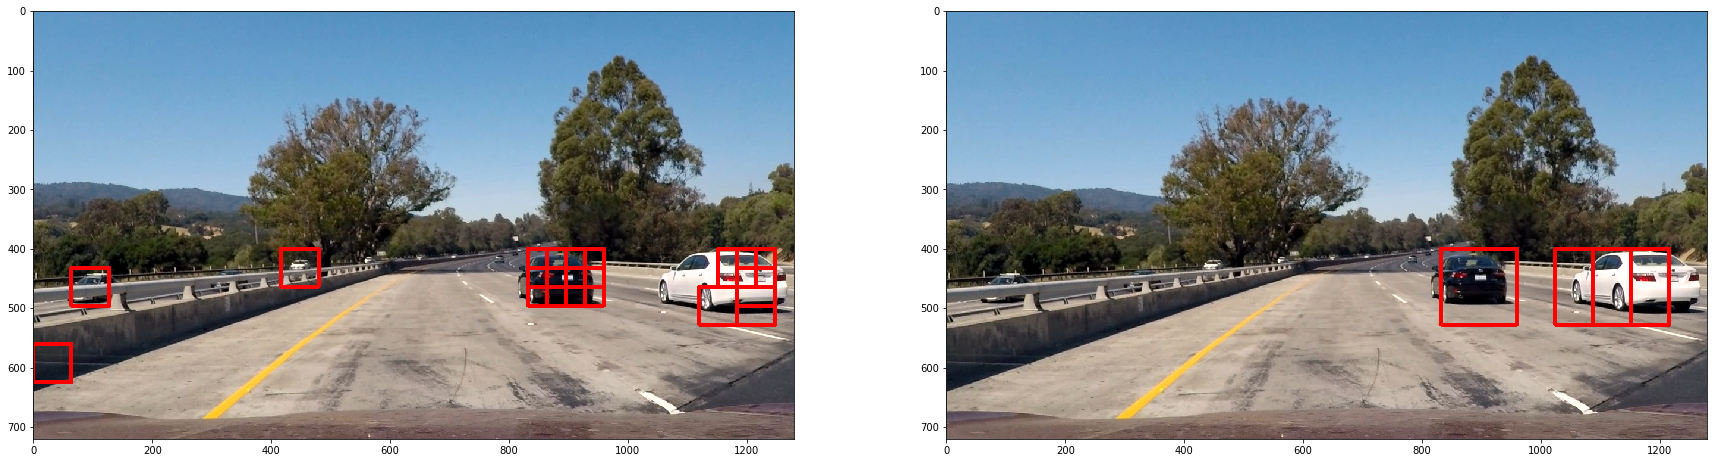

In [78]:
img = cv2.imread('test_images/test1.jpg')
plt.figure(figsize=(30,30))
ystart = 400
ystop = 700
scale = 1
img_out, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
plt.subplot(121)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_out)
ystart = 400
ystop = 700
scale = 2
img_out2, bboxes2 = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
plt.subplot(122)
img_out2 = cv2.cvtColor(img_out2, cv2.COLOR_BGR2RGB)
plt.imshow(img_out2)

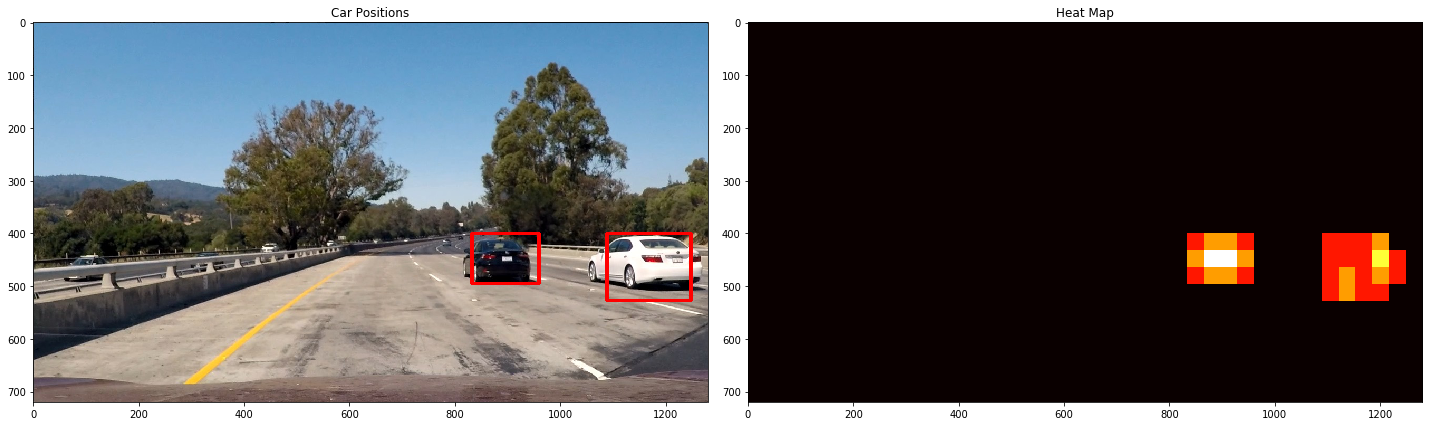

In [79]:
box_list = bboxes + bboxes2
heat_img = heat(img, box_list)

In [22]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import moviepy as mve

In [31]:
#Create video file pipeline
output = 'output_video.mp4'
clip1 = VideoFileClip('test_video.mp4')

out_clip = clip1.fl_image(process_image)
out_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output_video.mp4
[MoviePy] Writing video output_video.mp4


 97%|█████████▋| 38/39 [00:55<00:01,  1.67s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video.mp4 



In [ ]:
import glob
images = glob.glob('play_img/frame*.jpg')

In [ ]:
out = []
for img in images:
    img_load = cv2.imread(img)
    out.append(process_image(img_load))

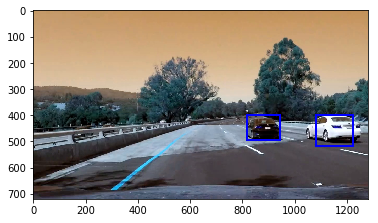

In [130]:
plt.imshow(out[24])

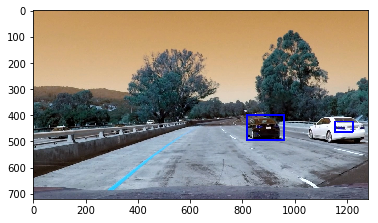

In [71]:
plt.imshow(proc)

In [75]:
import cv2
vidcap = cv2.VideoCapture('test_video.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  cv2.imwrite("play_img/frame%d.jpg" % count, image)     # save frame as JPEG file
  count += 1